In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [213]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_sample_submission = pd.read_csv('../data/spotify_sample_submission.csv')
df.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


In [214]:
df.shape

(129172, 19)

In [215]:
df.drop(columns= ['artists', 'name', 'release_date'], inplace=True)

In [216]:
df.head() 

,id,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.239,20


In [217]:
df.isna().sum()

id                  0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [218]:
df.duplicated().sum()

0

<Axes: xlabel='year', ylabel='popularity'>

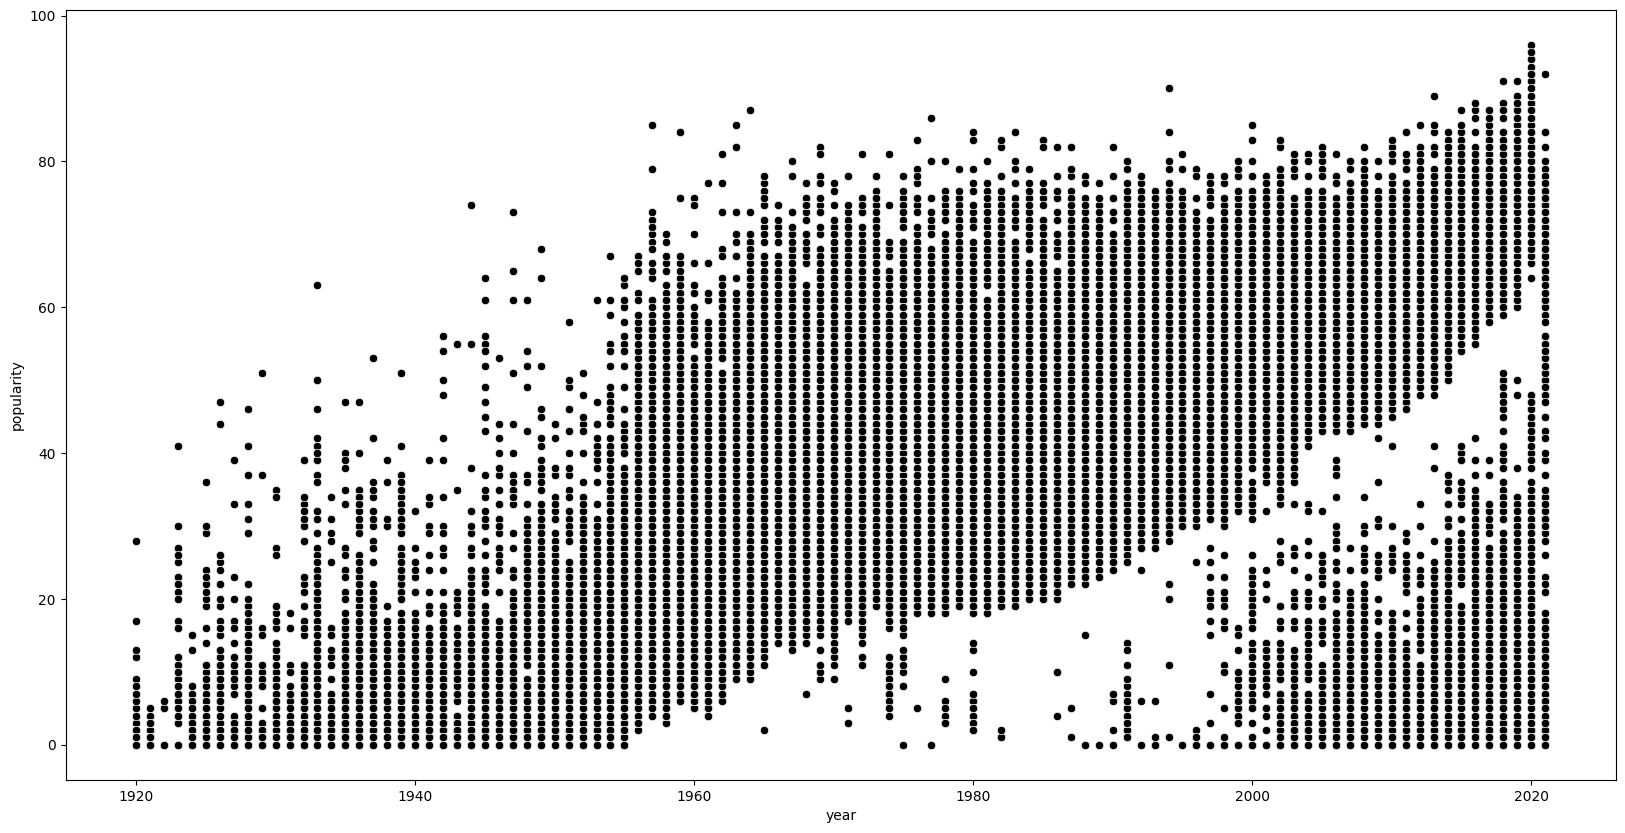

In [219]:
# YEAR ANALYSIS
plt.figure(figsize=(20,10))
sns.scatterplot(x='year', y='popularity', data=df, color='black')

# Mesmo havendo uma clara tendência de aumento da popularidade das músicas ao longo dos anos, é possível observar que há 
# uma grande quantidade de músicas com popularidade 0,  o que pode ser um problema para o modelo de predição.
# Por enquanto a melhor estrategia é eliminar a coluna

In [220]:
df.drop(['year'], axis = 1, inplace=True)
df.head()

,id,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.239,20


<Axes: >

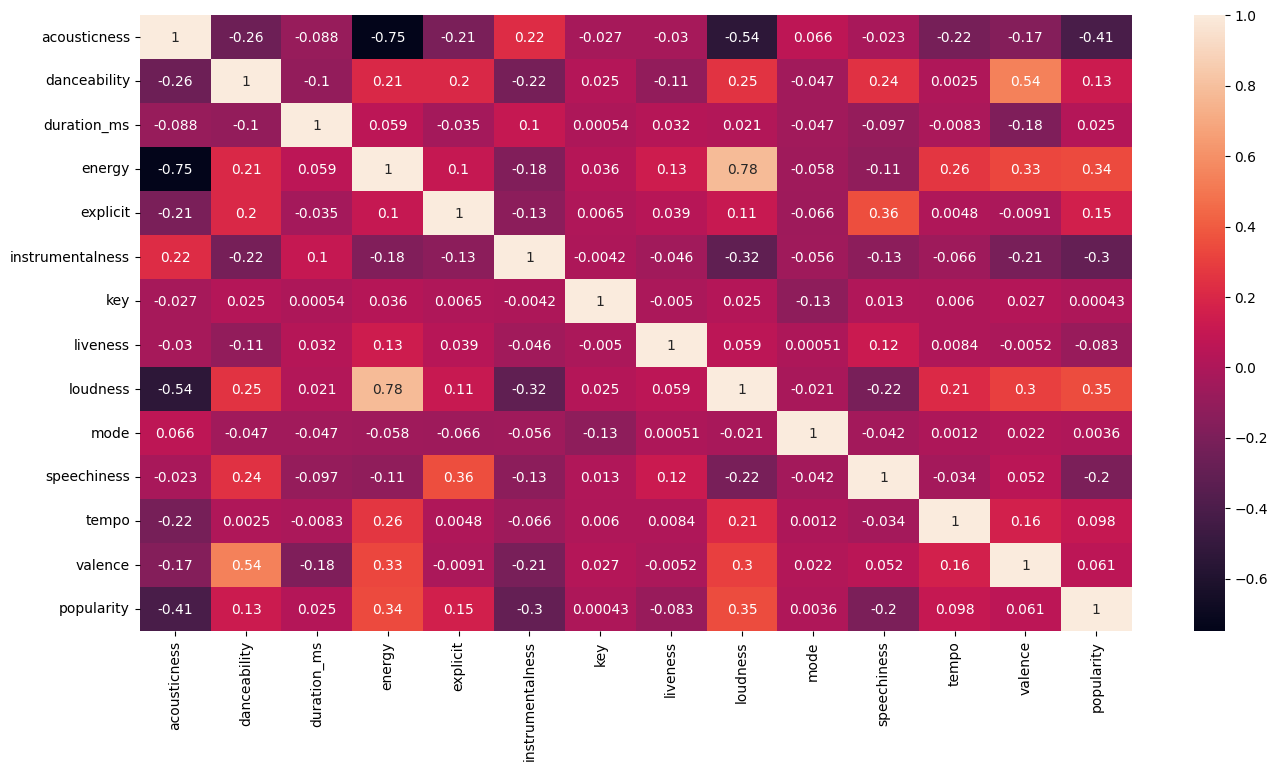

In [221]:
plt.figure(figsize=(16,8))
noid= df.drop(columns=['id'])
sns.heatmap(noid.corr(), annot=True)

In [222]:
# ACOUSTICNESS ANALYSIS
df.acousticness.describe()

count    129172.000000
mean          0.501950
std           0.379088
min           0.000000
25%           0.091800
50%           0.523000
75%           0.895000
max           0.996000
Name: acousticness, dtype: float64

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'popularity'}>, <Axes: >, <Axes: >]],
      dtype=object)

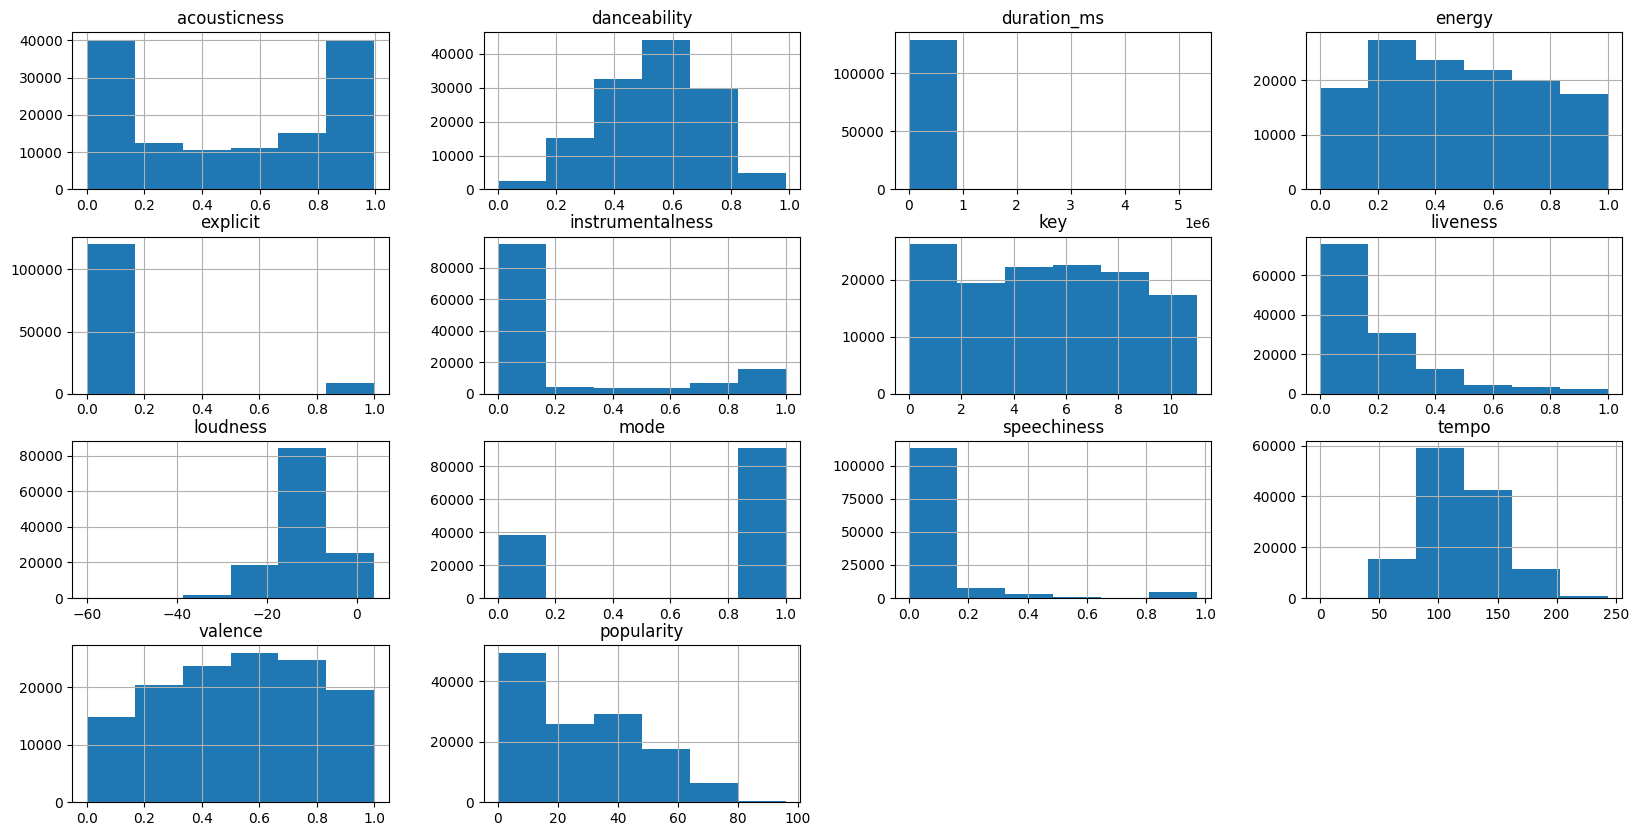

In [223]:
df.hist( bins=6, figsize=(20,10))

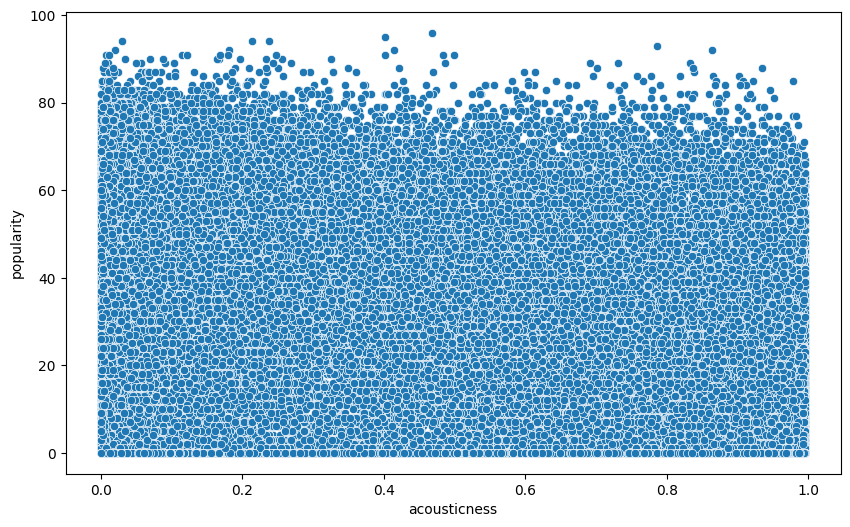

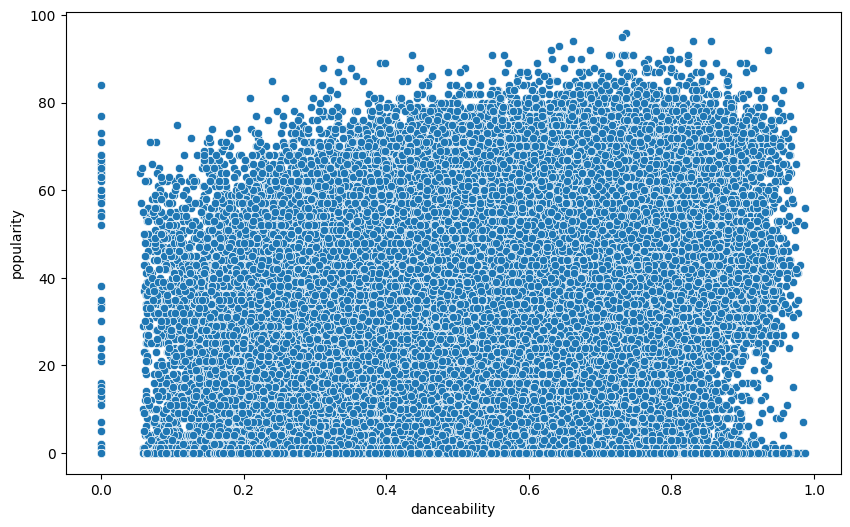

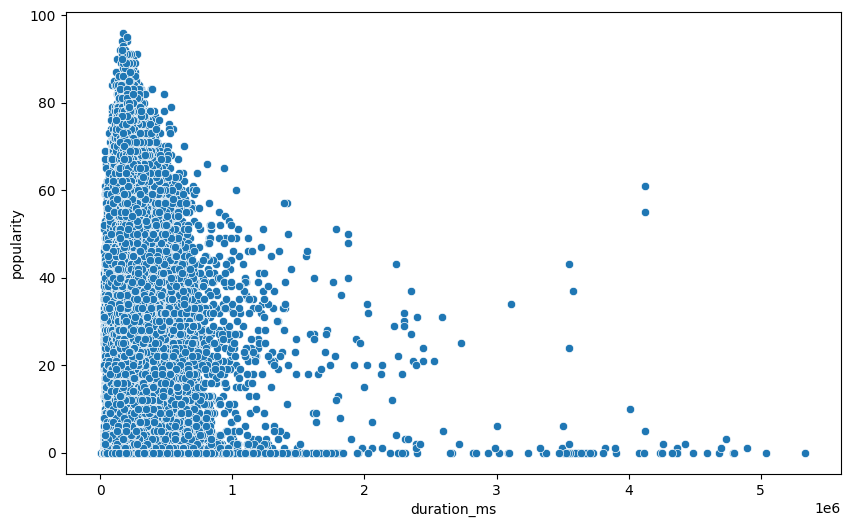

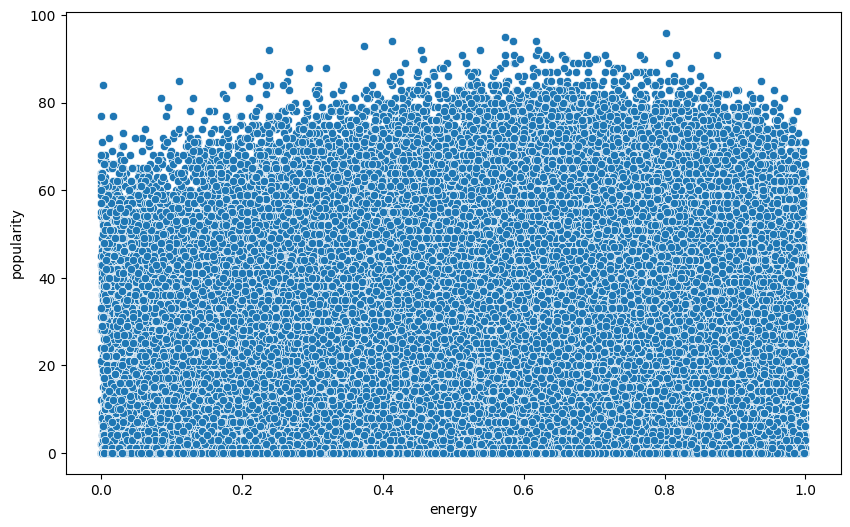

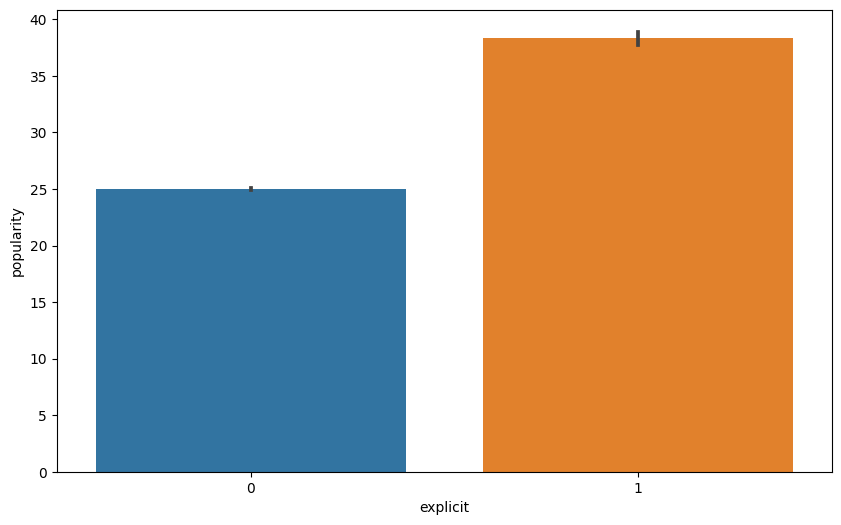

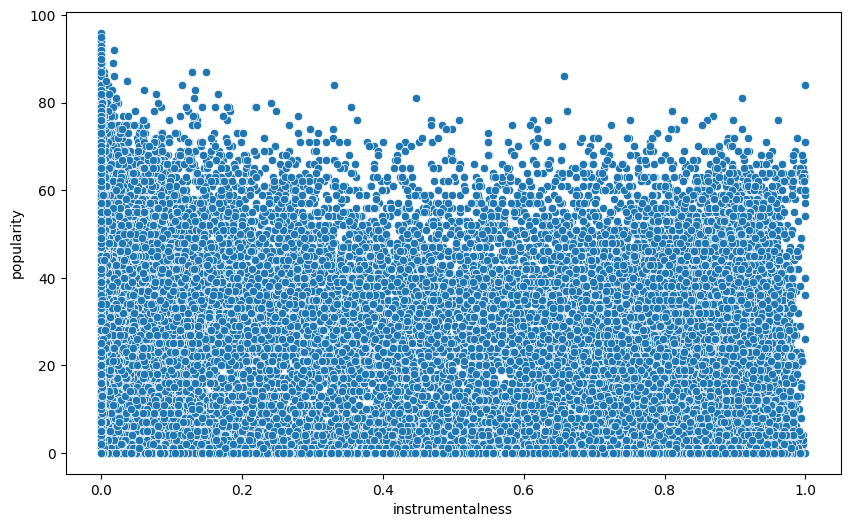

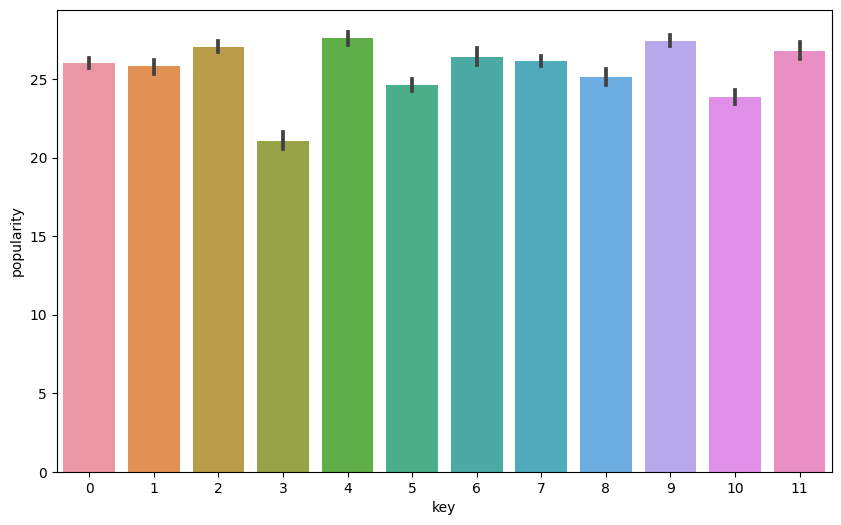

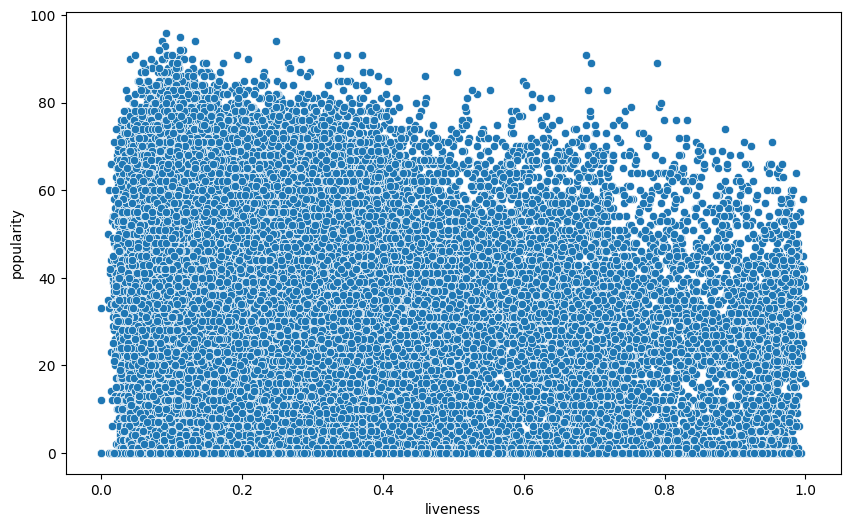

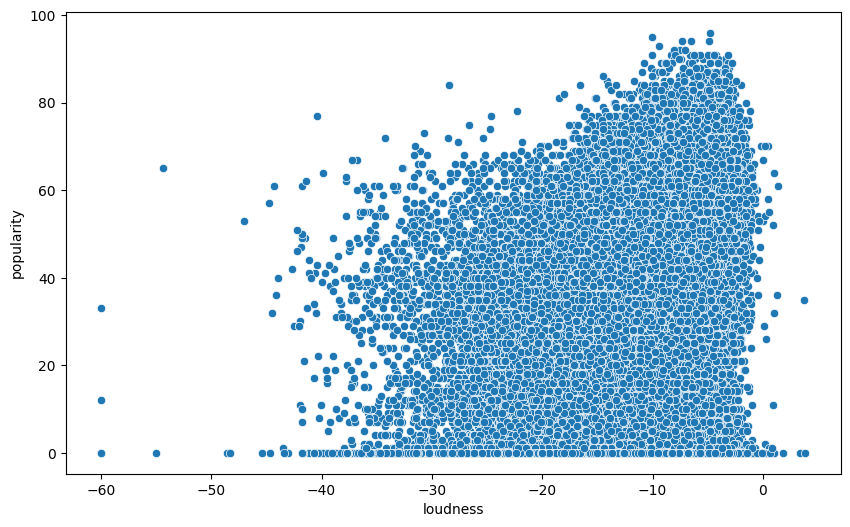

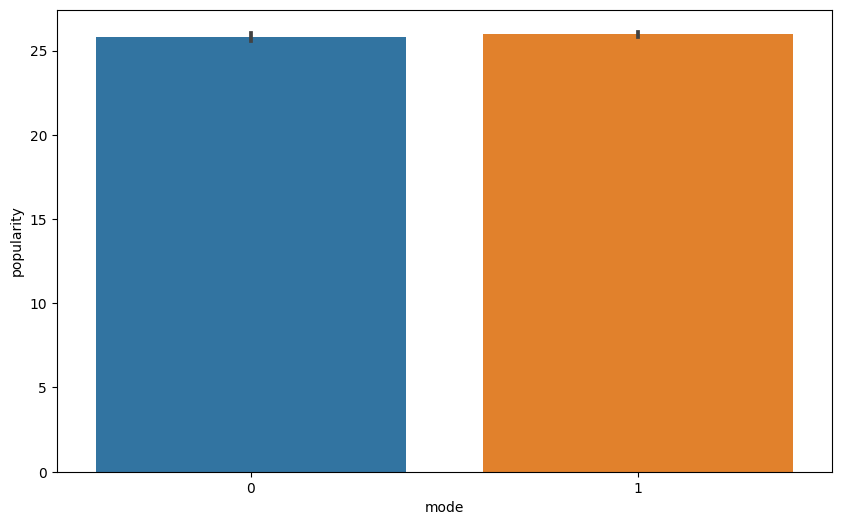

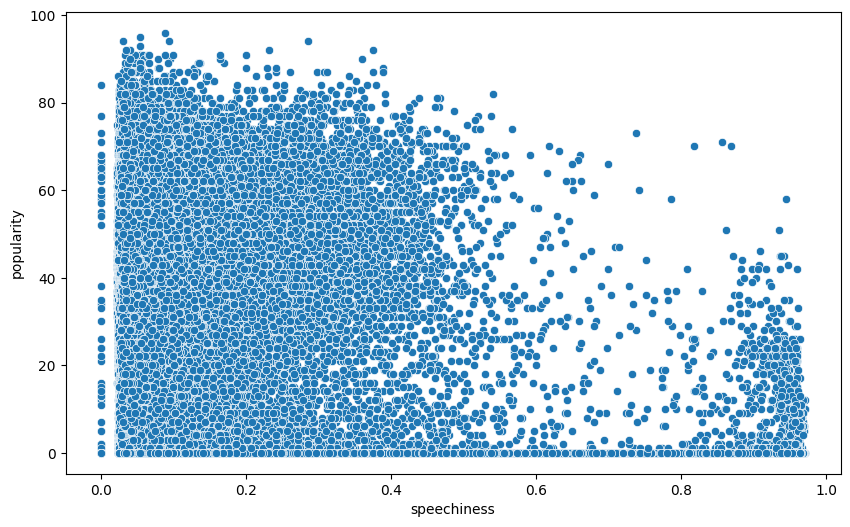

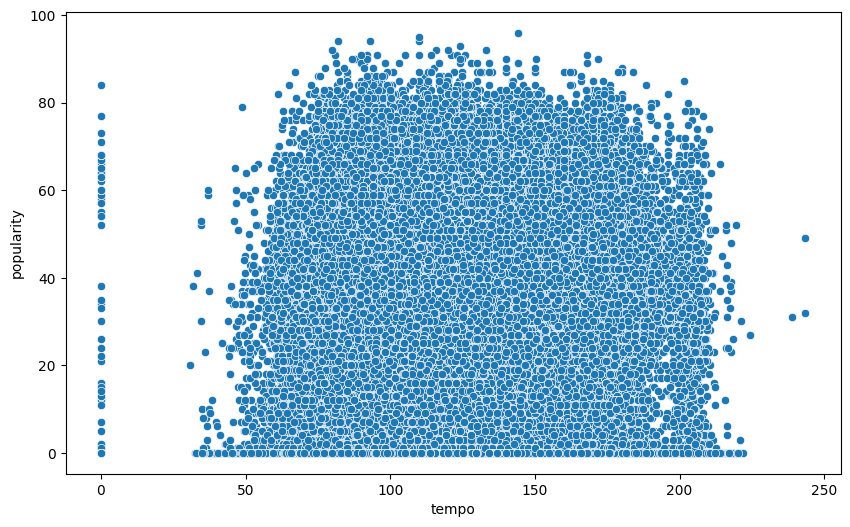

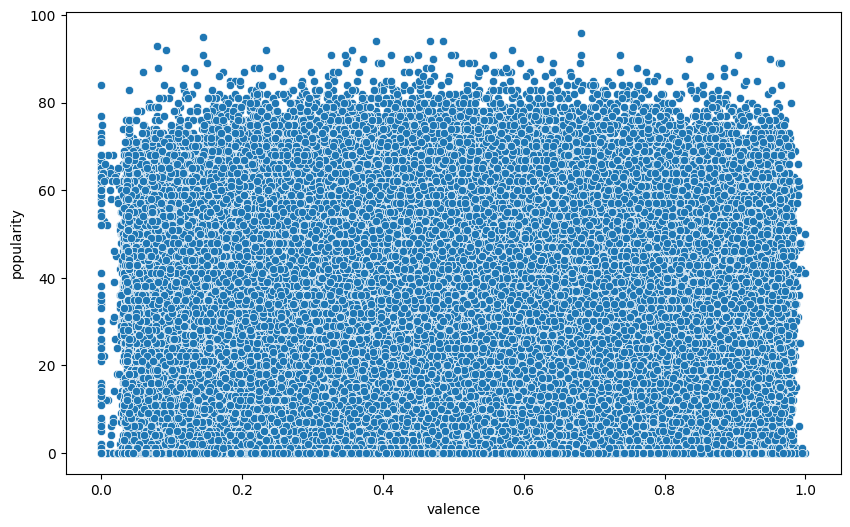

In [224]:
for i in df.columns[1:-1]:
    plt.figure(figsize=(10,6))
    if i in (['explicit', 'key', 'mode']):
        sns.barplot(x = df[i], y = df['popularity'])
    else:
        sns.scatterplot(x = df[i], y = df['popularity'])
    
    plt.show()

In [225]:
df.head()

,id,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.239,20


In [226]:
df.groupby('explicit').size()

explicit
0    120394
1      8778
dtype: int64

In [227]:
df.head()

,id,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.239,20


In [228]:
df.groupby('key').size().sort_values(ascending=False)

key
0     16211
7     15798
2     14002
9     13352
5     12321
1     10081
4      9877
10     9244
11     8134
8      7955
6      6836
3      5361
dtype: int64

In [229]:
df.head()

,id,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.239,20


In [230]:
df.groupby('mode').size()

mode
0    38252
1    90920
dtype: int64

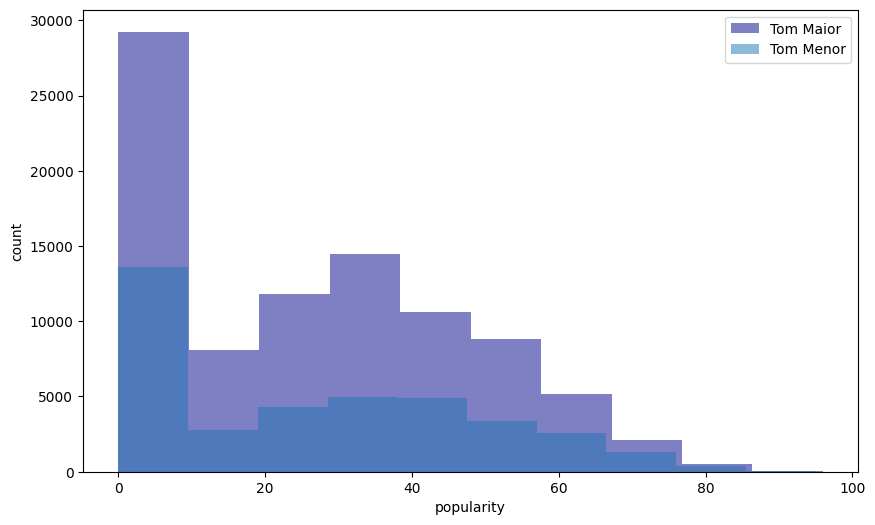

In [231]:
mode1 = df.loc[df['mode'] == 1]
mode0 = df.loc[df['mode'] == 0]

plt.figure(figsize=(10,6))
plt.hist(mode1['popularity'], bins=10, alpha=0.5, label='Tom Maior', color='darkblue')
plt.hist(mode0['popularity'], bins=10, alpha=0.5, label='Tom Menor')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

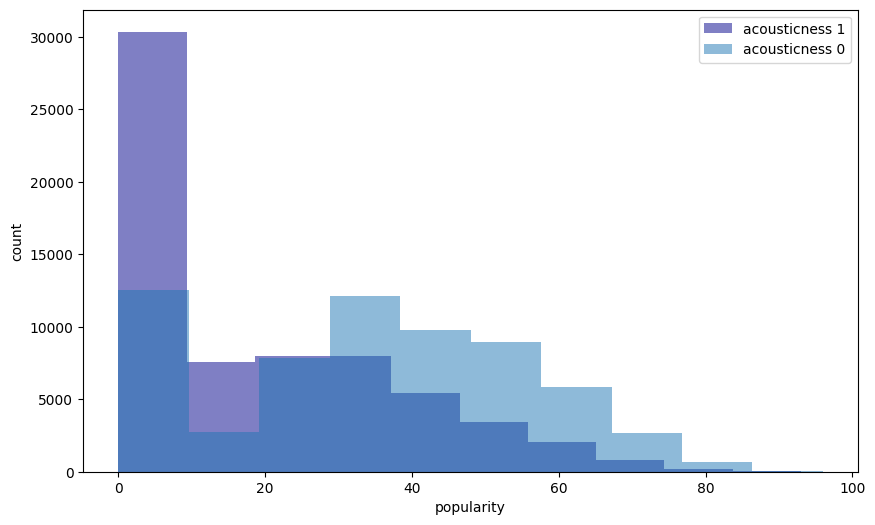

In [232]:
acc1 = df.loc[df['acousticness'] > df['acousticness'].mean()]
acc0 = df.loc[df['acousticness'] <= df['acousticness'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='acousticness 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='acousticness 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

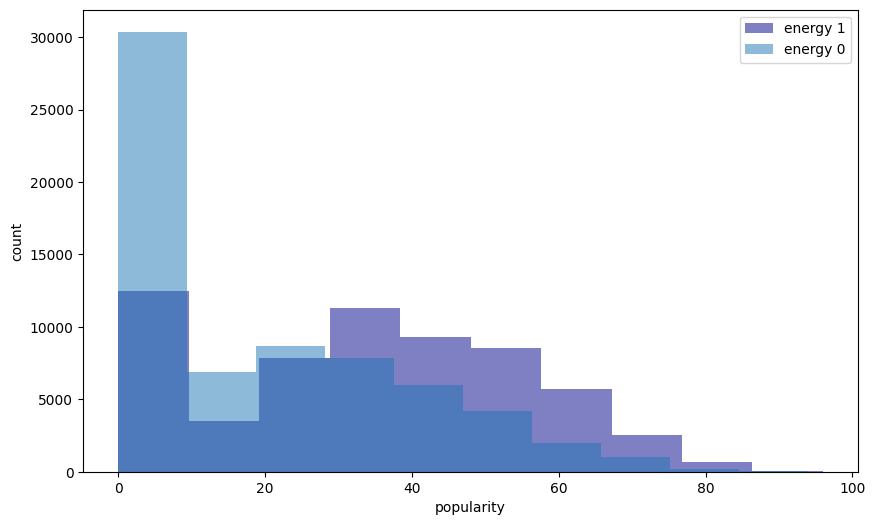

In [233]:
acc1 = df.loc[df['energy'] > df['energy'].mean()]
acc0 = df.loc[df['energy'] <= df['energy'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='energy 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='energy 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

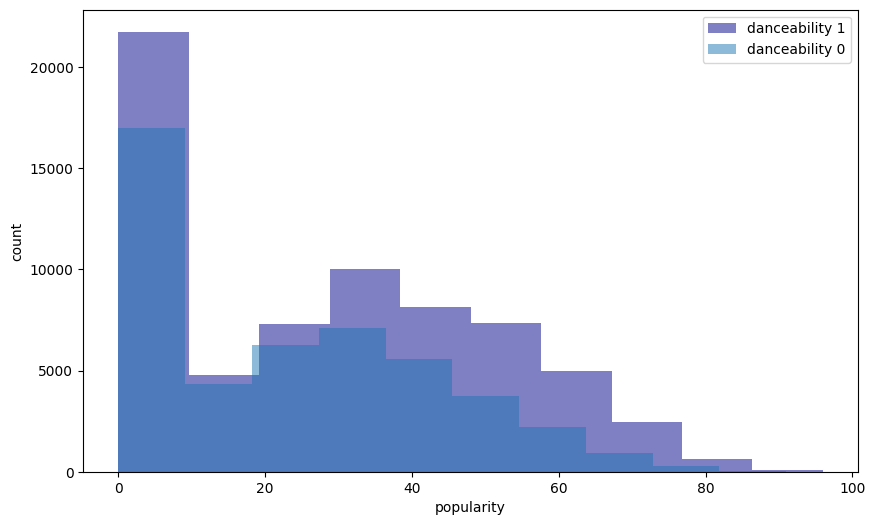

In [234]:
acc1 = df.loc[df['danceability'] > df['danceability'].mean()]
acc0 = df.loc[df['danceability'] <= df['energy'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='danceability 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='danceability 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

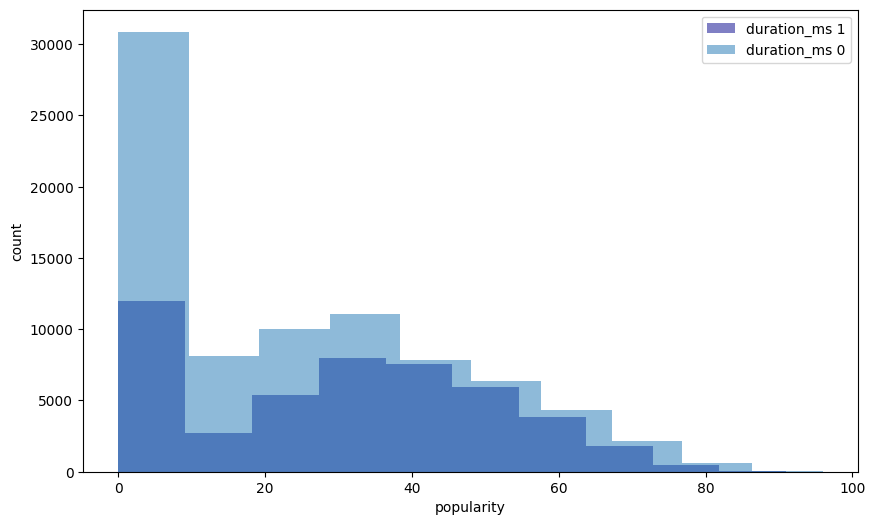

In [235]:
acc1 = df.loc[df['duration_ms'] > df['duration_ms'].mean()]
acc0 = df.loc[df['duration_ms'] <= df['duration_ms'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='duration_ms 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='duration_ms 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

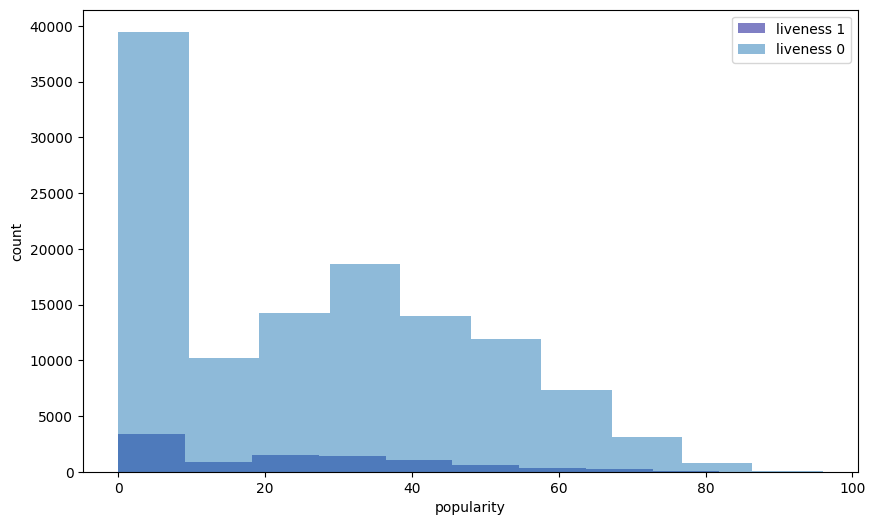

In [236]:
acc1 = df.loc[df['liveness'] > 0.52]
acc0 = df.loc[df['liveness'] <= 0.52]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='liveness 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='liveness 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

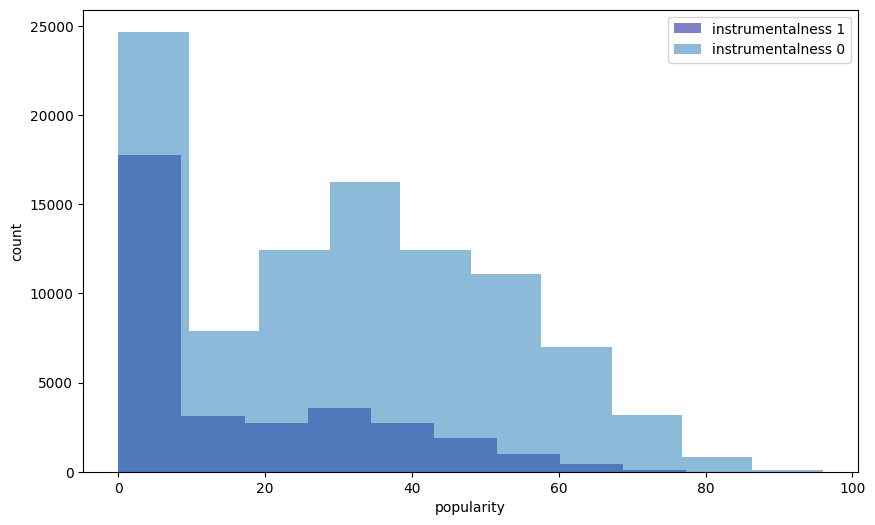

In [237]:
acc1 = df.loc[df['instrumentalness'] > df['instrumentalness'].mean()]
acc0 = df.loc[df['instrumentalness'] <= df['instrumentalness'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='instrumentalness 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='instrumentalness 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

In [238]:
df.loudness.describe()

count    129172.000000
mean        -11.767025
std           5.679598
min         -60.000000
25%         -14.905000
50%         -10.868000
75%          -7.532000
max           3.855000
Name: loudness, dtype: float64

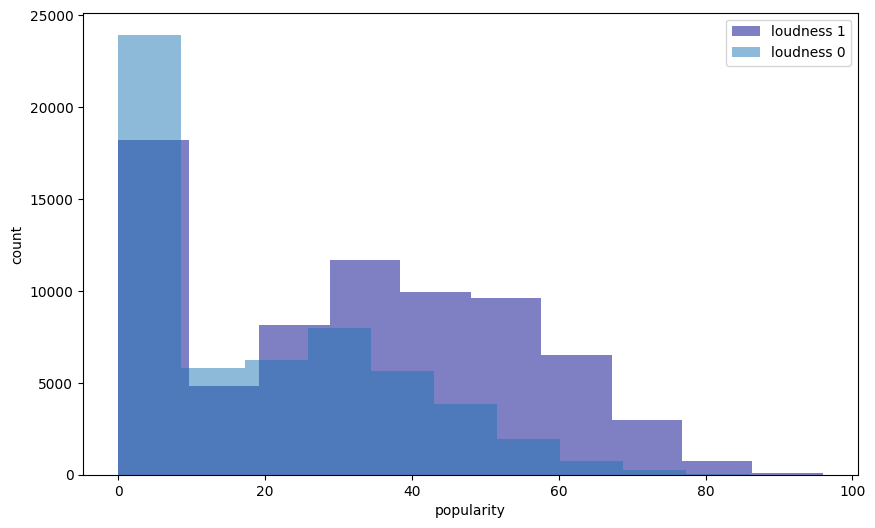

In [239]:
acc1 = df.loc[df['loudness'] > df['loudness'].mean()]
acc0 = df.loc[df['loudness'] <= df['loudness'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='loudness 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='loudness 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

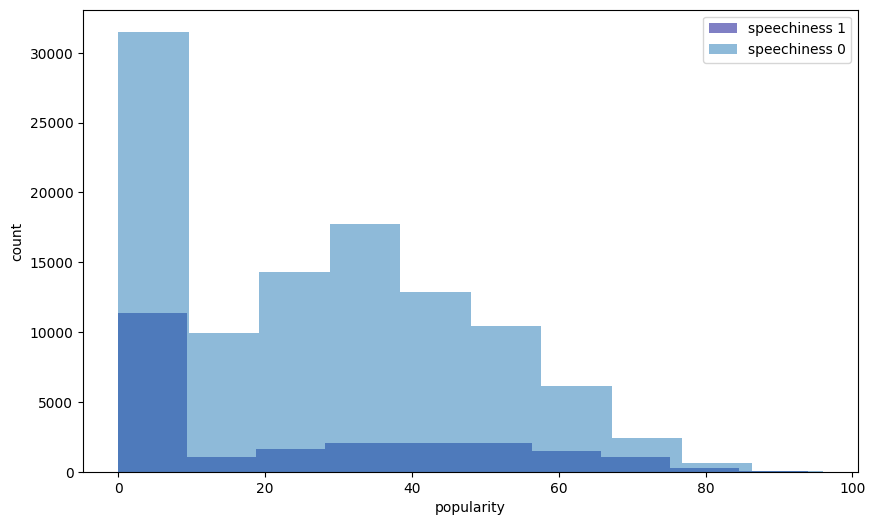

In [240]:
acc1 = df.loc[df['speechiness'] > df['speechiness'].mean()]
acc0 = df.loc[df['speechiness'] <= df['speechiness'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='speechiness 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='speechiness 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

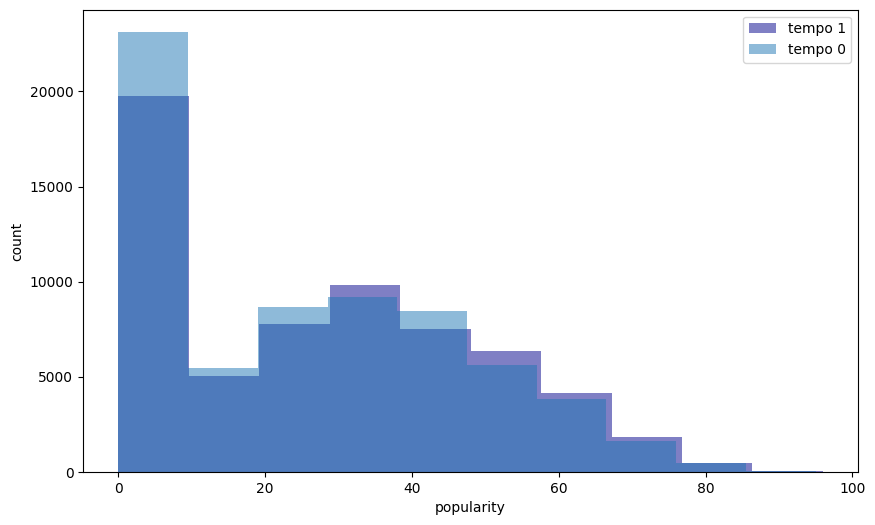

In [241]:
acc1 = df.loc[df['tempo'] > df['tempo'].mean()]
acc0 = df.loc[df['tempo'] <= df['tempo'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='tempo 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='tempo 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

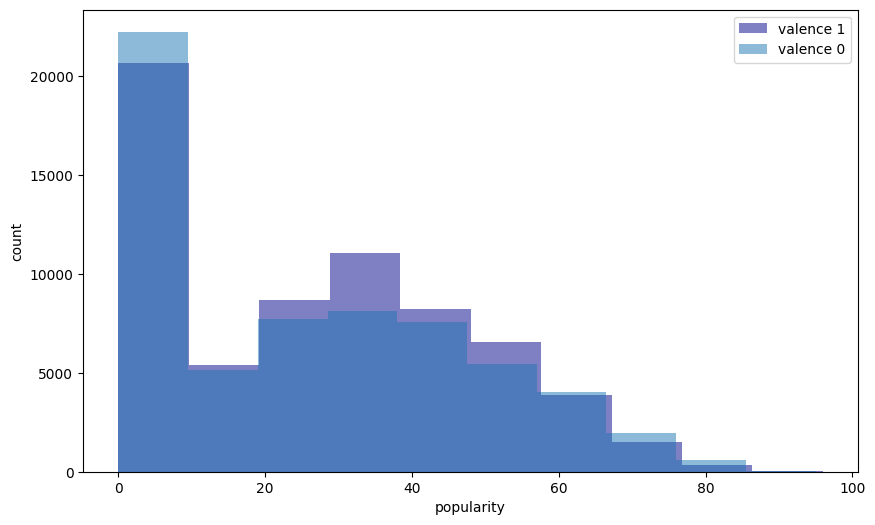

In [242]:
acc1 = df.loc[df['valence'] > df['valence'].mean()]
acc0 = df.loc[df['valence'] <= df['valence'].mean()]

plt.figure(figsize=(10,6))
plt.hist(acc1['popularity'], bins=10, alpha=0.5, label='valence 1', color='darkblue')
plt.hist(acc0['popularity'], bins=10, alpha=0.5, label='valence 0')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()

In [279]:
features = ['explicit','energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness','speechiness', 'duration_ms', 'tempo','valence', 'danceability']

x_train, x_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(df[features]), LabelEncoder().fit_transform(df['popularity']), test_size=0.2, random_state=42)



In [280]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 10, leaf_size = 20)

model.fit(x_train, y_train)

y_hat = model.predict(x_test)

In [281]:
print('r2_score = ', r2_score(y_test, y_hat))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_hat)))

r2_score =  0.41256779636259033
rmse: 16.863315628110982


In [282]:
y_hat = model.predict(StandardScaler().fit_transform(df_test[features]))
submission = pd.DataFrame({'id': df_test['id'], 'popularity': y_hat})
submission

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,47.1
1,17TO3XH1slhDyqnwypne06,34.8
2,5chxjST0MfWZPsaHrWgiqe,39.8
3,4Db6PxFIiK1a6nCEJABTHk,38.5
4,3MPKTMJIxlORqcxw542HHK,43.9
...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,12.4
43054,3gh5bl5nBDN6ubcbxltKdr,10.8
43055,6gVkG8f7ldsQs0jAI8cB4X,22.2
43056,6n6OQfBpCgzF9oEg8zhBN7,56.8


In [283]:
submission.to_csv('../data/my_submission2.csv', index=False)